In [3]:
import pandas as pd
import os

modules = pd.read_csv("2st_total_experiment_modules.csv", index_col=0)
rack = pd.read_excel("(220406)KETI 시험의뢰#1_2차시험_랙 데이터.xlsx", index_col = 0)
rack2 = pd.read_excel("(220406)KETI 시험의뢰#1_2차시험_랙 데이터_보정.xlsx", index_col = 0)

c:\users\juhyeong\desktop\rack_analysis\.venv\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


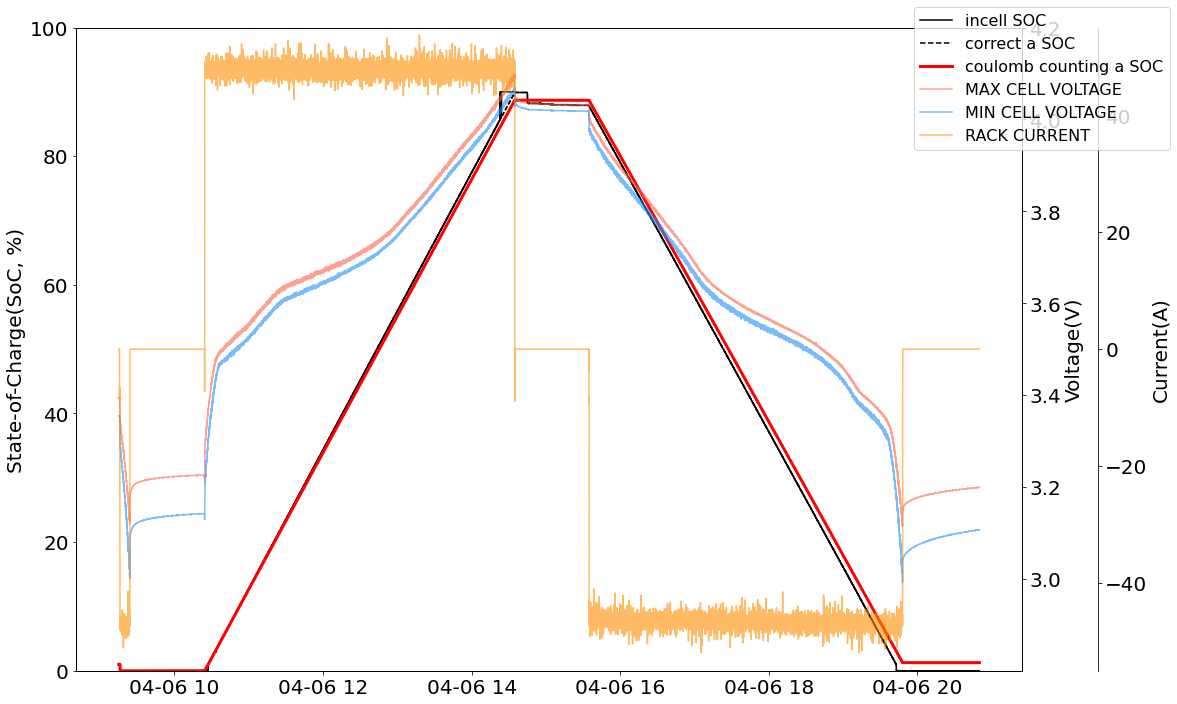

In [88]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from mpl_toolkits import axisartist
import matplotlib.pylab as plt

def plot_mean_voltage_modules(modules):
    module_mean_voltage = pd.DataFrame()
    cell_voltages = [ f'Cell_Voltage{i}' for i in range(1,13)]
    for i in range(1,modules.Module.max()+1):
        temp = modules.loc[modules['Module']==i]
        module_mean = temp[cell_voltages].mean(axis=1)
        module_mean_voltage = pd.concat([module_mean_voltage,module_mean], axis=1)
    ax2.plot(rack.index, module_mean_voltage.mean(axis=1)[:-1], color='green', label="MEAN CELL VOLTAGE(all modules)")

## RACK의 인셀 SOC, 전류적산법 SOC 출력

plt.rcParams['figure.figsize'] = [16, 10]

fig, ax1 = plt.subplots(figsize=(16,10))

plt.rc('font', size=20) 

ax1.plot(rack.index, rack["RACK_SOC"], color='black', label="incell SOC")
ax1.plot(rack2.index, rack2["RACK_SOC"], color='black', label="correct a SOC", linestyle="--")

start = "2022-04-06 10:24:24"
end = "2022-04-06 20:49:58"

start_idx = 4164
end_idx = 41698

coulomb_counting = pd.DataFrame(index = rack.index, columns=["Coulomb counting SOC"])
coulomb_counting.loc[:start_idx,"Coulomb counting SOC"] = rack.iloc[:start_idx]["RACK_SOC"]

for i in range(start_idx,end_idx+1):
    coulomb_counting.iloc[i]["Coulomb counting SOC"] = coulomb_counting.iloc[i-1]["Coulomb counting SOC"] + rack.iloc[i]["RACK_CURRENT"]/60/3600/3.75*100

ax1.plot(coulomb_counting.index, coulomb_counting["Coulomb counting SOC"], label="coulomb counting a SOC", color='red', linewidth=3)

ax1.set_ylabel("State-of-Charge(SoC, %)")
ax1.set_yticks([0,20,40,60,80,100])
ax1.set_ylim([0,100])

ax2 = ax1.twinx()

ax2.plot(rack.index, rack["MAX_CELL_VOLT"], color='tomato' , alpha=0.6, label="MAX CELL VOLTAGE")
ax2.plot(rack.index, rack["MIN_CELL_VOLT"], color='dodgerblue', alpha=0.6, label="MIN CELL VOLTAGE")

ax2.set_ylabel("Voltage(V)")
ax2.set_yticks([3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2])
ax2.set_ylim([2.8, 4.2])

ax3 = ax1.twinx()

ax3.plot(rack.index, rack["RACK_CURRENT"], color='darkorange' , alpha=0.6, label="RACK CURRENT")
ax3.set_ylabel("Current(A)")
ax3.set_ylim([-55, 55])

fig.tight_layout()
fig.legend(fontsize = 16)

plt.subplots_adjust(right=0.9)
ax3.spines["right"].set_position(("axes", 1.08))
plt.savefig("./2st_fig/rack/rack SOC.jpg", dpi=256)